# 第7章：単語ベクトル
https://nlp100.github.io/ja/ch07.html  

***
## 60. 単語ベクトルの読み込みと表示
> Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
import gensim

/Users/kawasakiharuka/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
wv = gensim.models.KeyedVectors.load_word2vec_format('../../data/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [3]:
# 単語ベクトル
wv["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [4]:
wv["United_States"].shape

(300,)

***
## 61. 単語の類似度
> “United States”と”U.S.”のコサイン類似度を計算せよ．

In [5]:
wv.similarity("United_States", "U.S.")

0.73107743

***
## 62. 類似度の高い単語10件
> “United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [6]:
wv.most_similar("United_States", topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

***
## 63. 加法構成性によるアナロジー
> “Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [7]:
wv.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

In [8]:
# 他のやり方
vec = wv['Spain'] - wv['Madrid'] + wv['Athens']
wv.similar_by_vector(vec)

[('Athens', 0.7528455853462219),
 ('Greece', 0.6685472130775452),
 ('Aristeidis_Grigoriadis', 0.5495778322219849),
 ('Ioannis_Drymonakos', 0.5361457467079163),
 ('Greeks', 0.5351786017417908),
 ('Ioannis_Christou', 0.5330225825309753),
 ('Hrysopiyi_Devetzi', 0.5088489055633545),
 ('Iraklion', 0.5059264302253723),
 ('Greek', 0.5040615797042847),
 ('Athens_Greece', 0.5034108757972717)]

***
## 64. アナロジーデータでの実験
> 単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [9]:
from tqdm import tqdm

In [10]:
with open("../../data/questions-words.txt", "r") as f:
    lines = f.readlines() # 1行ごとのリスト

In [11]:
lines[:5]

[': capital-common-countries\n',
 'Athens Greece Baghdad Iraq\n',
 'Athens Greece Bangkok Thailand\n',
 'Athens Greece Beijing China\n',
 'Athens Greece Berlin Germany\n']

In [12]:
new_list = []
    
for line in tqdm(lines):
    if ":" in line: # カテゴリ
        new_list.append(line)
    else:
        line = line.strip() # 改行削除
        word_list = line.split() #空白区切り
        similar_word, similarity = wv.most_similar(positive=[word_list[1], word_list[2]], negative=[word_list[0]], topn=1)[0]
        new_list.append(line+" "+similar_word+" "+str(similarity)+"\n")
    
with open("../../data/analogy.txt", "w") as wf:
    wf.writelines(new_list)

100%|██████████| 19558/19558 [1:26:49<00:00,  3.75it/s]


In [13]:
!head -10 ../../data/analogy.txt

: capital-common-countries
Athens Greece Baghdad Iraq Iraqi 0.635187029838562
Athens Greece Bangkok Thailand Thailand 0.7137669324874878
Athens Greece Beijing China China 0.7235778570175171
Athens Greece Berlin Germany Germany 0.6734622716903687
Athens Greece Bern Switzerland Switzerland 0.4919748306274414
Athens Greece Cairo Egypt Egypt 0.7527808547019958
Athens Greece Canberra Australia Australia 0.583732545375824
Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
Athens Greece Havana Cuba Cuba 0.6460990905761719


***
## 65. アナロジータスクでの正解率
> 64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [3]:
with open('../../data/analogy.txt', 'r') as f:
    sem_cnt = 0
    sem_acc = 0
    syn_cnt = 0
    syn_acc = 0
    
    flag=True
    for line in f:
        if ':' in line:
            if 'gram' in line:
                flag=False
            continue
        line2 = line.split()
        
        if flag:
            sem_cnt += 1
            if line2[3]==line2[4]:
                sem_acc += 1
        else:
            syn_cnt+=1
            if line2[3]==line2[4]:
                syn_acc += 1
                
print("意味的アナロジー正解率：{}%".format(round(sem_acc/sem_cnt*100, 2)))    
print("文法的アナロジー正解率：{}%".format(round(syn_acc/syn_cnt*100, 2))) 

意味的アナロジー正解率：73.09%
文法的アナロジー正解率：74.0%


***
## 66. WordSimilarity-353での評価
> The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [4]:
!head -10 '../../data/wordsim353/combined.csv'

In [5]:
def sim(x):
    return wv.similarity(x['Word 1'], x['Word 2'])

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('../../data/wordsim353/combined.csv')
df['wv'] = df.apply(sim, axis=1) # 各行に対して関数を適用

print(df.head())
print('')

# スピアマン相関係数を求める
print(df[['wv', 'Human (mean)']].corr(method="spearman"))

     Word 1    Word 2  Human (mean)        wv
0      love       sex          6.77  0.263938
1     tiger       cat          7.35  0.517296
2     tiger     tiger         10.00  1.000000
3      book     paper          7.46  0.363463
4  computer  keyboard          7.62  0.396392

                    wv  Human (mean)
wv            1.000000      0.700017
Human (mean)  0.700017      1.000000


***
## 67. k-meansクラスタリング
> 国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [8]:
# データ作成

countries = set()

flaga = False
flagb= False
with open('../../data/analogy.txt', 'r') as f:
    for line in f:
        line = line.strip() # 改行削除
        if ':' in line:
            #print(line)
            flaga = False
            flagb = False
            #if 'capital-common-countries' or 'capital-world' in line:
            if line in [': capital-common-countries', ': capital-world']:
                flaga = True
            #elif 'currency' or 'gram6-nationality-adjective' in line:
            elif line in [': currency', ': gram6-nationality-adjective']:
                flagb = True
        else:
            if flaga:
                countries.add(line.split()[1])
            elif flagb:
                countries.add(line.split()[0])
                
countries = list(countries)
print(countries)
print('\nn_countries:', len(countries))

['Turkmenistan', 'Estonia', 'Malaysia', 'Uruguay', 'Slovakia', 'Colombia', 'Algeria', 'Somalia', 'Bangladesh', 'Botswana', 'Uganda', 'Gambia', 'Peru', 'Nigeria', 'Tunisia', 'Romania', 'Ghana', 'Fiji', 'Canada', 'Montenegro', 'Taiwan', 'Croatia', 'Mozambique', 'Australia', 'Slovenia', 'Malawi', 'Iceland', 'Nepal', 'Tuvalu', 'Azerbaijan', 'Senegal', 'Switzerland', 'Korea', 'Oman', 'Sudan', 'Philippines', 'Finland', 'Jamaica', 'Burundi', 'Macedonia', 'Belarus', 'Kenya', 'Zambia', 'Armenia', 'Serbia', 'Ireland', 'Israel', 'Brazil', 'Angola', 'Guyana', 'Bahamas', 'Lithuania', 'Niger', 'Belize', 'Austria', 'Argentina', 'Hungary', 'Syria', 'Latvia', 'Qatar', 'Bhutan', 'Pakistan', 'Dominica', 'Albania', 'Spain', 'Thailand', 'Honduras', 'Iraq', 'Italy', 'Ecuador', 'Malta', 'Kazakhstan', 'Cyprus', 'Libya', 'Iran', 'USA', 'Denmark', 'Portugal', 'Netherlands', 'England', 'Lebanon', 'Belgium', 'Turkey', 'Mali', 'Bahrain', 'Gabon', 'Suriname', 'Rwanda', 'Sweden', 'Afghanistan', 'Mauritania', 'Greenl

In [9]:
import numpy as np

In [10]:
# 単語ベクトルの取得

countries_vec = [wv[country] for country in countries]
print(np.array(countries_vec).shape)
#print(countries_vec)

(129, 300)


In [11]:
from sklearn.cluster import KMeans

In [12]:
# k-means

kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)

for i in range(5):
    cluster = np.where(kmeans.labels_==i)[0]
    print('cluster', i+1)
    print(', '.join([countries[k] for k in cluster]))

cluster 1
Algeria, Somalia, Botswana, Uganda, Gambia, Nigeria, Ghana, Mozambique, Malawi, Senegal, Sudan, Burundi, Kenya, Zambia, Angola, Niger, Mali, Gabon, Rwanda, Mauritania, Liberia, Guinea, Madagascar, Eritrea, Zimbabwe, Namibia
cluster 2
Estonia, Slovakia, Romania, Canada, Montenegro, Croatia, Slovenia, Iceland, Switzerland, Finland, Macedonia, Belarus, Serbia, Ireland, Lithuania, Austria, Hungary, Latvia, Albania, Spain, Italy, Malta, Cyprus, USA, Denmark, Portugal, Netherlands, England, Belgium, Sweden, Greenland, Poland, Ukraine, Germany, Moldova, Europe, Bulgaria, Greece, France, Russia, Norway, Georgia, Liechtenstein
cluster 3
Turkmenistan, Malaysia, Bangladesh, Fiji, Taiwan, Australia, Nepal, Tuvalu, Korea, Oman, Philippines, Qatar, Bhutan, Thailand, Kazakhstan, Bahrain, Uzbekistan, Japan, Cambodia, Indonesia, China, Tajikistan, India, Laos, Vietnam
cluster 4
Uruguay, Colombia, Peru, Jamaica, Brazil, Guyana, Bahamas, Belize, Argentina, Dominica, Honduras, Ecuador, Suriname,

***
## 68. Ward法によるクラスタリング
> 国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

In [13]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

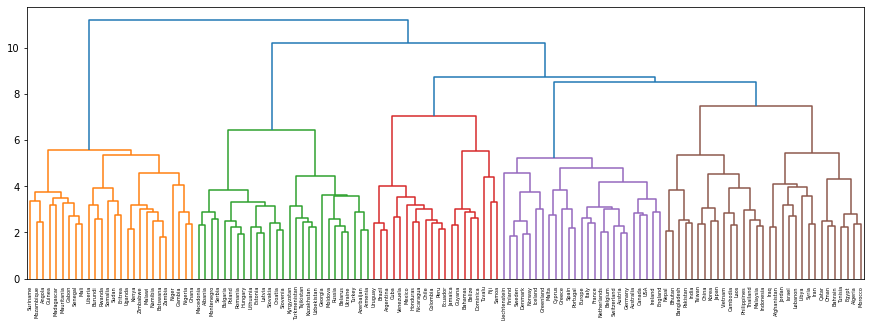

In [20]:
plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward') # クラスタリング（ウォード法）
dendrogram(Z, labels=countries) # デンドログラム 向きを変えられる, orientation='right'
plt.show()

***
## 69. t-SNEによる可視化
> ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

In [21]:
import bhtsne

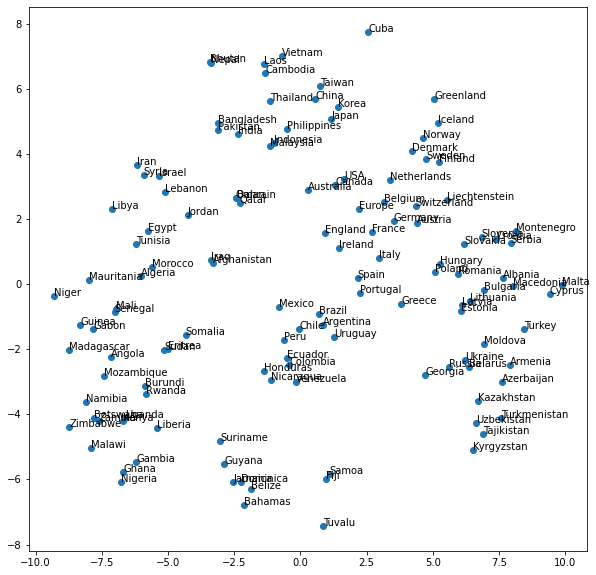

In [22]:
# t-sneで次元削減
embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=123)

# プロット
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()